In [1]:
suppressMessages(library(SummarizedExperiment))
suppressMessages(library(limma))
suppressMessages(library(jaffelab))

In [2]:
load("/ceph/projects/v4_phase3_paper/inputs/counts/_m/caudate_brainseq_phase3_hg38_rseGene_merged_n464.rda")

In [3]:
load("/ceph/projects/v4_phase3_paper/inputs/counts/_m/caudate_brainseq_phase3_hg38_rseJxn_merged_n464.rda")

In [4]:
ls()

[1] "rse_gene" "rse_jxn"

In [5]:
all(colnames(rse_jxn) == colnames(rse_gene))

[1] TRUE

In [6]:
rowData(rse_jxn)$Length <- 100

In [7]:
rse_genes_and_drd2junctions = rbind(rse_jxn[c('chr11:113412884-113415420(-)', 'chr11:113414462-113415420(-)', 'chr11:113412884-113414374(-)'),],
      rse_gene)



In [8]:
rowData(rse_genes_and_drd2junctions)

DataFrame with 58040 rows and 21 columns
                             inGencode inGencodeStart inGencodeEnd
                             <logical>      <logical>    <logical>
chr11:113412884-113415420(-)      TRUE           TRUE         TRUE
chr11:113414462-113415420(-)      TRUE           TRUE         TRUE
chr11:113412884-113414374(-)      TRUE           TRUE         TRUE
ENSG00000223972.5                   NA             NA           NA
ENSG00000227232.5                   NA             NA           NA
...                                ...            ...          ...
ENSG00000198695.2                   NA             NA           NA
ENSG00000210194.1                   NA             NA           NA
ENSG00000198727.2                   NA             NA           NA
ENSG00000210195.2                   NA             NA           NA
ENSG00000210196.2                   NA             NA           NA
                                  gencodeGeneID       ensemblID      Symbol
            

In [9]:
rpkm = recount::getRPKM(rse_genes_and_drd2junctions, 'Length')

Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)



In [10]:
log2rpkm = log2( rpkm + 1)

In [11]:
summary(rowMeans(rpkm))


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.00e+00 0.00e+00 9.00e-02 9.18e+00 1.45e+00 2.85e+05 

In [12]:
summary(rowMeans(log2rpkm))


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000000  0.004363  0.116758  0.845061  1.221697 18.066738 

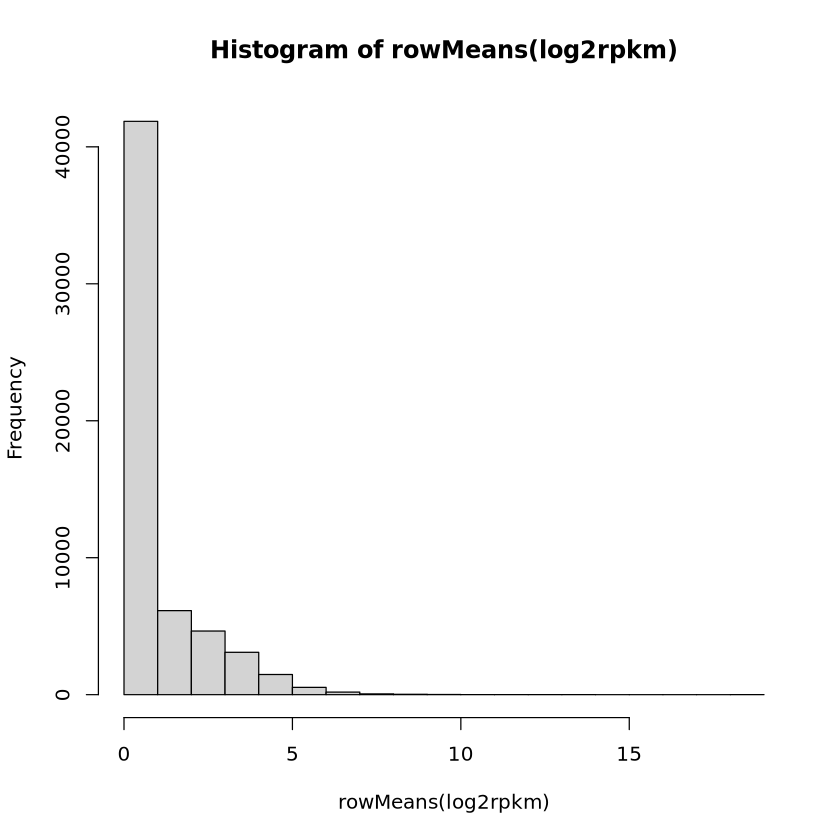

In [13]:
hist(rowMeans(log2rpkm))

In [14]:
sum(rowMeans(log2rpkm) > 0.2)

[1] 26513

In [15]:
head(rowMeans(log2rpkm))

chr11:113412884-113415420(-) chr11:113414462-113415420(-) 
                 2.286196886                  5.434090727 
chr11:113412884-113414374(-)            ENSG00000223972.5 
                 5.040896395                  0.005958403 
           ENSG00000227232.5            ENSG00000278267.1 
                 1.757976379                  1.984660317

In [16]:
filtered_log2_rpkm = log2rpkm[rowMeans(log2rpkm) > 0.2,]

In [ ]:
write.csv(filtered_log2_rpkm, file='log2rpkm.csv')